## Import Libraries  

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


## Read the dataset

In [48]:
df = pd.read_csv('stocks/AMRX.csv')

In [49]:
# take close column
data = df['Close']

In [50]:
data.head()

0    15.01
1    14.71
2    14.47
3    13.95
4    14.70
Name: Close, dtype: float64

## Walk Forward Methodology

In [51]:
def walk_forward_methodology(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [52]:
# take three past days data as input
dataX,dataY =  walk_forward_methodology(data,3)

## Split dataset into the train (80%) and test (20%)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(dataX,dataY,test_size=0.2,shuffle=False)

In [54]:
x_train

array([[15.01000023, 14.71000004, 14.47000027],
       [14.71000004, 14.47000027, 13.94999981],
       [14.47000027, 13.94999981, 14.69999981],
       ...,
       [ 3.42000008,  3.44000006,  2.75999999],
       [ 3.44000006,  2.75999999,  2.6500001 ],
       [ 2.75999999,  2.6500001 ,  2.73000002]])

## Linear Regression

In [55]:
# Initialize linear regression model
LinearRegression = LinearRegression()

In [56]:
#train the linear regression model
LinearRegression.fit(x_train,y_train)

LinearRegression()

In [57]:
# predicted on the test dataset
y_pred = LinearRegression.predict(x_test)

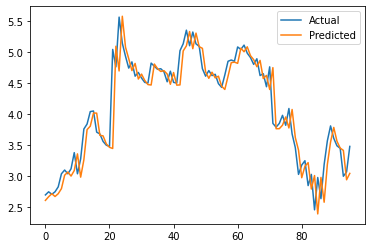

In [58]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## Random Forest Regressor

In [59]:
# Initialize random forest regressor model
RandomForestRegressor = RandomForestRegressor(max_depth=2, random_state=0)

In [60]:
#train the random forest regressor model
RandomForestRegressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [61]:
# predicted on the test dataset
y_pred = RandomForestRegressor.predict(x_test)

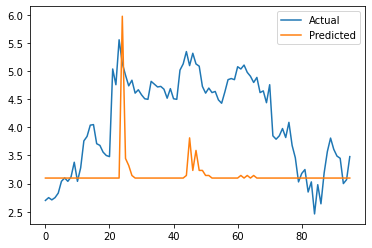

In [62]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## **LSTM-DNN**

In [63]:


model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(3,1),return_sequences=True),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),

])
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_33 (LSTM)              (None, 200)               240800    
                                                                 
 dense_29 (Dense)            (None, 128)               25728     
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 307,457
Trainable params: 307,457
Non-trainable params: 0
_________________________________________________________________


In [64]:
#train the lstm-dnn model
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
12/12 [==============================] - 5s 15ms/step - loss: 166.4465 - mse: 166.4465
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 34.7697 - mse: 34.7697
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 15.4651 - mse: 15.4651
Epoch 4/50
12/12 [==============================] - 0s 22ms/step - loss: 9.7816 - mse: 9.7816
Epoch 5/50
12/12 [==============================] - 0s 14ms/step - loss: 4.3351 - mse: 4.3351
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 2.2611 - mse: 2.2611
Epoch 7/50
12/12 [==============================] - 0s 14ms/step - loss: 1.5056 - mse: 1.5056
Epoch 8/50
12/12 [==============================] - 0s 12ms/step - loss: 1.1536 - mse: 1.1536
Epoch 9/50
12/12 [==============================] - 0s 13ms/step - loss: 1.0166 - mse: 1.0166
Epoch 10/50
12/12 [==============================] - 0s 12ms/step - loss: 0.8720 - mse: 0.8720
Epoch 11/50
12/12 [==============================] 

In [65]:
# predicted on the test dataset
y_pred = model.predict(x_test)

3/3 [==============================] - 1s 13ms/step


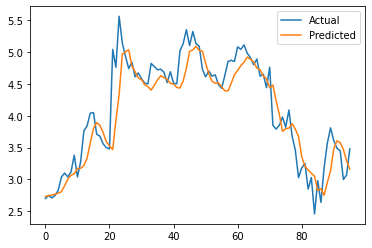

In [66]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## **1D-CNN-LSTM-DNN**

In [74]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu', padding='same', input_shape=(1,1,3)),
    tf.keras.layers.Conv1D(64, kernel_size=1, activation='relu', padding='same'),
    tf.keras.layers.Reshape((1,64)),
    tf.keras.layers.LSTM(100,return_sequences=True),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')

])
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 1, 32)          128       
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 1, 64)          2112      
                                                                 
 reshape_1 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_36 (LSTM)              (None, 1, 100)            66000     
                                                                 
 lstm_37 (LSTM)              (None, 200)               240800    
                                                                 
 dense_33 (Dense)            (None, 128)               25728     
                                                                 
 dense_34 (Dense)            (None, 1)               

In [75]:
#Dataset reshape to cnn input
x_train_cnn = x_train.reshape(x_train.shape[0],1,1,x_train.shape[1])
x_test_cnn = x_test.reshape(x_test.shape[0],1,1,x_test.shape[1])

In [76]:
#cnn-lstm-dnn model training
history = model.fit(x_train_cnn,y_train,epochs=50)

Epoch 1/50
 1/12 [=>............................] - ETA: 0s - loss: 210.6823 - mse: 210.6823

C:\Users\Developer\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 [==============================] - 1s 63ms/step - loss: 189.2362 - mse: 189.2362
Epoch 2/50
12/12 [==============================] - 1s 60ms/step - loss: 75.8087 - mse: 75.8087
Epoch 3/50
12/12 [==============================] - 1s 55ms/step - loss: 21.8476 - mse: 21.8476
Epoch 4/50
12/12 [==============================] - 1s 60ms/step - loss: 9.6055 - mse: 9.6055
Epoch 5/50
12/12 [==============================] - 1s 60ms/step - loss: 4.4071 - mse: 4.4071
Epoch 6/50
12/12 [==============================] - 1s 78ms/step - loss: 2.2779 - mse: 2.2779
Epoch 7/50
12/12 [==============================] - 1s 51ms/step - loss: 1.3909 - mse: 1.3909
Epoch 8/50
12/12 [==============================] - 1s 51ms/step - loss: 1.1120 - mse: 1.1120
Epoch 9/50
12/12 [==============================] - 1s 55ms/step - loss: 0.8985 - mse: 0.8985
Epoch 10/50
12/12 [==============================] - 1s 57ms/step - loss: 0.7249 - mse: 0.7249
Epoch 11/50
12/12 [==============================] - 1s 56ms/s

In [70]:
y_pred = model.predict(x_test_cnn)

3/3 [==============================] - 0s 30ms/step


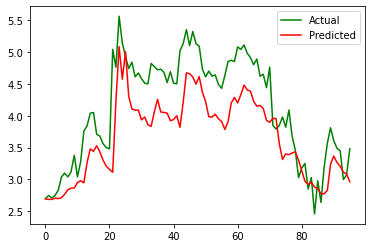

In [73]:
# Predicted value charts and actual values chart comparison
plt.plot(y_test, label='Actual',color='green')
plt.plot(y_pred, label='Predicted',color='red')
plt.legend()
plt.show()